In [9]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

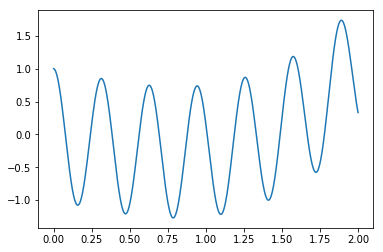

In [10]:
x = np.linspace(0,2,1000)
y = np.cos(20*x)-np.abs(x)/2+(x**3)/4

plt.plot(x,y)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

700
700
300
300


In [12]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(Adam(0.01),loss='mse',metrics=['accuracy'])

# Display the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 8,515
Trainable params: 8,515
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Training
history = model.fit( x_train, y_train, epochs=3100, verbose=0)

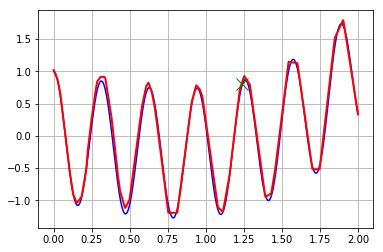

In [31]:
# Compute the output 
y_predicted = model.predict(x)
y2 = model.predict([1.23456789])
# Display the result
plt.plot(x, y,'b')
plt.plot(x, y_predicted, 'r', linewidth=2)
plt.plot(1.23456789, y2,'xg',markersize=12)
plt.grid()
plt.show()

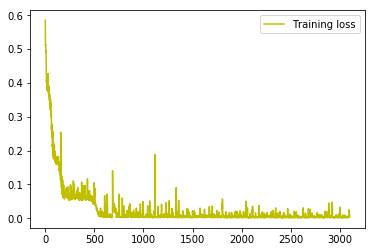

In [15]:
Loss = history.history['loss']
Epochs = range(1,len(Loss)+1)
plt.plot(Epochs, Loss, 'y', label='Training loss')
plt.legend()
plt.show()

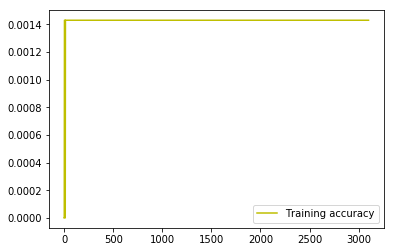

In [16]:
acc = history.history['accuracy']
Epochs = range(1,len(Loss)+1)
plt.plot(Epochs, acc, 'y', label='Training accuracy')
plt.legend()
plt.show()